### Data Mining and Machine Learning
### Random Forest using scikit-learn and h2o
#### Datasets: Diabetes and Landsat
#### Edgar Acuna
#### Noviembre 2019

In [1]:
import h2o
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
import warnings
warnings.filterwarnings('ignore')
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O cluster uptime:,1 hour 0 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.4835
H2O cluster version age:,"28 days, 8 hours and 6 minutes"
H2O cluster name:,H2O_from_python_eacun_tlx1kv
H2O cluster total nodes:,1
H2O cluster free memory:,2.930 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


### I- Applying Random Forest to Diabetes using H20. 

In [8]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=50,nfolds=10,max_depth=10)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print ((y_pred['predict']==diabetes['C9']).mean())

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
[0.9609375]


In [9]:
model.model_performance(diabetes)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.04148428577005806
RMSE: 0.20367691516236705
LogLoss: 0.18451227855679672
Mean Per-Class Error: 0.0075970149253731245
AUC: 0.999705223880597
pr_auc: 0.9957164118199302
Gini: 0.999410447761194

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4839289401471615: 


,,1,2,Error,Rate
0,1,498.0,2.0,0.004,(2.0/500.0)
1,2,3.0,265.0,0.0112,(3.0/268.0)
2,Total,501.0,267.0,0.0065,(5.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.483929,0.990654,170.0
1,max f2,0.414960,0.992593,179.0
2,max f0point5,0.483929,0.991766,170.0
3,max accuracy,0.483929,0.993490,170.0
4,max precision,0.989667,1.000000,0.0
5,max recall,0.414960,1.000000,179.0
6,max specificity,0.989667,1.000000,0.0
7,max absolute_mcc,0.483929,0.985663,170.0
8,max min_per_class_accuracy,0.459856,0.992000,173.0
9,max mean_per_class_accuracy,0.483929,0.992403,170.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.88 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.949782,2.865672,2.865672,1.000000,0.964414,1.000000,0.964414,0.029851,0.029851,186.567164,186.567164
1,,2,0.020833,0.936433,2.865672,2.865672,1.000000,0.942699,1.000000,0.953557,0.029851,0.059701,186.567164,186.567164
2,,3,0.031250,0.930333,2.865672,2.865672,1.000000,0.932329,1.000000,0.946481,0.029851,0.089552,186.567164,186.567164
3,,4,0.040365,0.920785,2.865672,2.865672,1.000000,0.925765,1.000000,0.941803,0.026119,0.115672,186.567164,186.567164
4,,5,0.050781,0.912023,2.865672,2.865672,1.000000,0.914704,1.000000,0.936244,0.029851,0.145522,186.567164,186.567164
5,,6,0.100260,0.872906,2.865672,2.865672,1.000000,0.890469,1.000000,0.913654,0.141791,0.287313,186.567164,186.567164
6,,7,0.151042,0.834845,2.865672,2.865672,1.000000,0.854549,1.000000,0.893783,0.145522,0.432836,186.567164,186.567164
7,,8,0.200521,0.764641,2.865672,2.865672,1.000000,0.790600,1.000000,0.868322,0.141791,0.574627,186.567164,186.567164
8,,9,0.300781,0.625392,2.865672,2.865672,1.000000,0.694184,1.000000,0.810276,0.287313,0.861940,186.567164,186.567164
9,,10,0.399740,0.311722,1.395130,2.501629,0.486842,0.465065,0.872964,0.724816,0.138060,1.000000,39.512962,150.162866


### Showing the confusion matrix including the accuracy estimated by out-of-bag and Cross-validation

In [10]:
#Mostrando la matrix de confusion para estimar la precision out-of-bag y por validacion crizada
model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1574793417261_1602


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,68798.0,10.0,10.0,10.0,89.0,122.0,104.72




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16175637622361375
RMSE: 0.40218947801206056
LogLoss: 0.5293728957452339
Mean Per-Class Error: 0.24661194029850741
AUC: 0.8208544776119403
pr_auc: 0.692546438566962
Gini: 0.6417089552238806

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3392435448211536: 


,,1,2,Error,Rate
0,1,356.0,144.0,0.288,(144.0/500.0)
1,2,55.0,213.0,0.2052,(55.0/268.0)
2,Total,411.0,357.0,0.2591,(199.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.339244,0.681600,225.0
1,max f2,0.128220,0.788330,322.0
2,max f0point5,0.558793,0.676692,130.0
3,max accuracy,0.558793,0.766927,130.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.339244,0.484299,225.0
8,max min_per_class_accuracy,0.378644,0.746269,205.0
9,max mean_per_class_accuracy,0.339244,0.753388,225.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.918782,2.149254,2.149254,0.750000,0.950872,0.750000,0.950872,0.022388,0.022388,114.925373,114.925373
1,,2,0.020833,0.889413,2.865672,2.507463,1.000000,0.903391,0.875000,0.927131,0.029851,0.052239,186.567164,150.746269
2,,3,0.031250,0.858054,2.507463,2.507463,0.875000,0.872571,0.875000,0.908945,0.026119,0.078358,150.746269,150.746269
3,,4,0.040365,0.844035,2.456290,2.495908,0.857143,0.851547,0.870968,0.895984,0.022388,0.100746,145.628998,149.590756
4,,5,0.050781,0.827383,2.149254,2.424799,0.750000,0.834315,0.846154,0.883334,0.022388,0.123134,114.925373,142.479908
5,,6,0.100260,0.759382,2.186960,2.307424,0.763158,0.790993,0.805195,0.837763,0.108209,0.231343,118.695994,130.742392
6,,7,0.151042,0.692334,2.277842,2.297478,0.794872,0.725588,0.801724,0.800049,0.115672,0.347015,127.784156,129.747813
7,,8,0.200521,0.633273,1.809898,2.177166,0.631579,0.661108,0.759740,0.765765,0.089552,0.436567,80.989788,117.716612
8,,9,0.300781,0.506885,1.377011,1.910448,0.480519,0.567269,0.666667,0.699600,0.138060,0.574627,37.701105,91.044776
9,,10,0.399740,0.401906,1.319717,1.764208,0.460526,0.451883,0.615635,0.638276,0.130597,0.705224,31.971720,76.420827




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.16023377863567836
RMSE: 0.4002921166294415
LogLoss: 0.5223098828850693
Mean Per-Class Error: 0.24720895522388053
AUC: 0.8261194029850747
pr_auc: 0.6842978654325876
Gini: 0.6522388059701494

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3433928567171097: 


,,1,2,Error,Rate
0,1,361.0,139.0,0.278,(139.0/500.0)
1,2,58.0,210.0,0.2164,(58.0/268.0)
2,Total,419.0,349.0,0.2565,(197.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.343393,0.680713,220.0
1,max f2,0.128792,0.793505,327.0
2,max f0point5,0.512104,0.681424,142.0
3,max accuracy,0.512104,0.772135,142.0
4,max precision,0.915556,0.857143,5.0
5,max recall,0.000012,1.000000,399.0
6,max specificity,0.947500,0.998000,0.0
7,max absolute_mcc,0.417896,0.490741,183.0
8,max min_per_class_accuracy,0.366149,0.746000,209.0
9,max mean_per_class_accuracy,0.343393,0.752791,220.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.64 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.897220,2.149254,2.149254,0.750000,0.924945,0.750000,0.924945,0.022388,0.022388,114.925373,114.925373
1,,2,0.020833,0.863748,2.149254,2.149254,0.750000,0.880860,0.750000,0.902902,0.022388,0.044776,114.925373,114.925373
2,,3,0.031250,0.853323,2.865672,2.388060,1.000000,0.857413,0.833333,0.887739,0.029851,0.074627,186.567164,138.805970
3,,4,0.040365,0.839523,2.456290,2.403467,0.857143,0.844708,0.838710,0.878023,0.022388,0.097015,145.628998,140.346654
4,,5,0.050781,0.823665,2.149254,2.351320,0.750000,0.832505,0.820513,0.868686,0.022388,0.119403,114.925373,135.132032
5,,6,0.100260,0.742527,2.186960,2.270207,0.763158,0.782389,0.792208,0.826098,0.108209,0.227612,118.695994,127.020740
6,,7,0.151042,0.679817,2.130884,2.223366,0.743590,0.711491,0.775862,0.787566,0.108209,0.335821,113.088404,122.336593
7,,8,0.200521,0.614778,1.809898,2.121341,0.631579,0.644580,0.740260,0.752284,0.089552,0.425373,80.989788,112.134135
8,,9,0.300781,0.498487,1.637527,1.960070,0.571429,0.554374,0.683983,0.686314,0.164179,0.589552,63.752665,96.006978
9,,10,0.399740,0.396947,1.282011,1.792212,0.447368,0.436968,0.625407,0.624587,0.126866,0.716418,28.201100,79.221158




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.7585837,0.06103972,0.8375,0.7692308,0.72602737,0.70238096,0.81333333,0.70731705,0.85333335,0.73333335,0.7717391,0.67164177
1,auc,0.8316859,0.039551105,0.87127274,0.8684211,0.79787236,0.7650639,0.80699086,0.80871826,0.8589065,0.87536657,0.86206895,0.80217785
2,err,0.24141629,0.06103972,0.1625,0.23076923,0.2739726,0.29761904,0.18666667,0.29268292,0.14666666,0.26666668,0.22826087,0.3283582
3,err_count,18.5,4.8819394,13.0,15.0,20.0,25.0,14.0,24.0,11.0,20.0,21.0,22.0
4,f0point5,0.65606725,0.059663393,0.71895427,0.6122449,0.6188119,0.60301507,0.766129,0.59907836,0.72649574,0.65957445,0.63414633,0.62222224
5,f1,0.72065425,0.034726724,0.7719298,0.7058824,0.71428573,0.65753424,0.7307692,0.68421054,0.75555557,0.75609756,0.7123288,0.71794873
6,f2,0.8063964,0.05780405,0.8333333,0.8333333,0.8445946,0.72289157,0.6985294,0.797546,0.787037,0.8857143,0.8125,0.8484849
7,lift_top_group,2.2719107,1.246472,3.2,3.4210527,2.8076923,2.7096775,2.6785715,0.0,0.0,2.419355,3.1724138,2.310345
8,logloss,0.51876056,0.15958025,0.43723023,0.41212085,0.5115452,0.94971126,0.5240708,0.50480574,0.4166965,0.43938,0.4350815,0.55696344
9,max_per_class_error,0.34310666,0.11424555,0.18181819,0.3043478,0.40425533,0.33962265,0.32142857,0.3962264,0.1904762,0.45454547,0.2857143,0.55263156



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-11-26 14:54:16,2.404 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-11-26 14:54:16,2.420 sec,1.0,0.560263,9.007818,0.624533,0.291717,1.517120,0.361404
2,,2019-11-26 14:54:16,2.421 sec,2.0,0.529376,7.436444,0.669056,0.324685,1.492537,0.321814
3,,2019-11-26 14:54:16,2.437 sec,3.0,0.503706,6.207919,0.704917,0.356736,1.693351,0.305882
4,,2019-11-26 14:54:16,2.453 sec,4.0,0.503645,6.067562,0.703577,0.361961,1.526792,0.323881
5,,2019-11-26 14:54:16,2.458 sec,5.0,0.486595,5.037063,0.720708,0.387038,1.667300,0.336170
6,,2019-11-26 14:54:16,2.473 sec,6.0,0.474694,4.243047,0.734243,0.410551,1.794663,0.306094
7,,2019-11-26 14:54:16,2.489 sec,7.0,0.466745,3.891300,0.741042,0.427082,1.775470,0.306649
8,,2019-11-26 14:54:16,2.489 sec,8.0,0.459266,3.314663,0.750863,0.446032,1.842217,0.286667
9,,2019-11-26 14:54:16,2.505 sec,9.0,0.456303,2.905268,0.750165,0.468827,1.856632,0.295905



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1387.447021,1.000000,0.276782
1,C6,829.292114,0.597711,0.165436
2,C8,763.812744,0.550517,0.152373
3,C7,539.188049,0.388619,0.107563
4,C1,420.065033,0.302761,0.083799
5,C5,388.825134,0.280245,0.077567
6,C3,373.957001,0.269529,0.074601
7,C4,310.192719,0.223571,0.061880


<bound method H2OBinomialModel.confusion_matrix of >

### Finding the importance of each feature

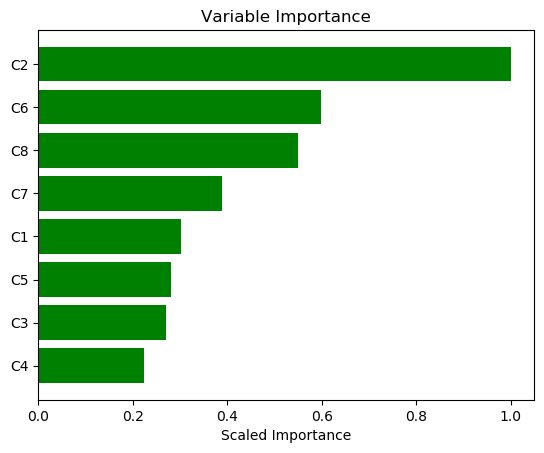

In [11]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### According to  random Forest  the most important predictors are plas, age y mass

### II Random Forest  for Diabetes using scikit learn

In [12]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True,random_state=0)
clf.fit(X, y)
print("The accuracy estimated by resubstiution is", clf.score(X,y))

The accuracy estimated is 0.9869791666666666


#### Estimating the accuracy

In [13]:
# Tasa de precision
predictions = clf.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       1.00      0.97      0.98       268

    accuracy                           0.99       768
   macro avg       0.99      0.98      0.99       768
weighted avg       0.99      0.99      0.99       768



In [14]:
print(confusion_matrix(y,predictions))

[[499   1]
 [  9 259]]


#### Estimating the accuracy by cross-validation

In [15]:
from sklearn.model_selection import cross_val_score
rfmodel=clf.fit(X, y)
scores = cross_val_score(rfmodel, X, y, cv=10)
scores
#Hallando la precision media y un intervalo de confianza 
print("CV Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.758 (+/- 0.095)


#### Estimating the accuracy by Out-of-Bag

In [16]:
#Tasa de precision usando out-of-Bag
print(clf.oob_score_)

0.7421875


#### Finding the most important features 

In [11]:
print(clf.feature_importances_)

[0.08178093 0.25522871 0.08433383 0.07064764 0.06914087 0.17326173
 0.12167218 0.14393411]


#### The most important features are the same as above:  plas, mass and age

### III. Random Forest para Landsat usando H2o

In [12]:
#Leyendo los datos
datos= h2o.import_file("http://academic.uprm.edu/eacuna/landsat.txt")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36']
datos['C37']=datos['C37'].asfactor()
myy="C37"
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print ((y_pred['predict']==datos['C37']).sum()/float(len(datos)))
model.model_performance(datos)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
0.9828635851183766

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.02615160531238596
RMSE: 0.16171457977679674
LogLoss: 0.11302719107951993
Mean Per-Class Error: 0.027928540629813207

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,Error,Rate
0,1072.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 1,072"
1,1.0,477.0,0.0,0.0,1.0,0.0,0.004175,2 / 479
2,0.0,0.0,961.0,0.0,0.0,0.0,0.000000,0 / 961
3,0.0,0.0,38.0,365.0,0.0,12.0,0.120482,50 / 415
4,11.0,0.0,0.0,0.0,453.0,6.0,0.036170,17 / 470
5,0.0,0.0,3.0,4.0,0.0,1031.0,0.006744,"7 / 1,038"
6,1084.0,477.0,1002.0,369.0,454.0,1049.0,0.017136,"76 / 4,435"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.982864
1,2,0.999775
2,3,0.999775
3,4,1.000000
4,5,1.000000
5,6,1.000000


In [13]:
#Mostrando la matrix de confusion para estimar la precision out-of-bag y por validacion crizada
print(model.confusion_matrix)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1574793417261_1074


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,300.0,386419.0,10.0,10.0,10.0,23.0,173.0,98.08




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.08653814063905821
RMSE: 0.2941736572826639
LogLoss: 0.31283768714750804
Mean Per-Class Error: 0.13124981190640303

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,Error,Rate
0,1054.0,3.0,12.0,1.0,2.0,0.0,0.016791,"18 / 1,072"
1,0.0,468.0,2.0,2.0,2.0,5.0,0.022965,11 / 479
2,7.0,2.0,914.0,26.0,1.0,11.0,0.048907,47 / 961
3,5.0,6.0,82.0,240.0,3.0,79.0,0.421687,175 / 415
4,33.0,5.0,1.0,6.0,390.0,35.0,0.170213,80 / 470
5,0.0,3.0,21.0,66.0,21.0,927.0,0.106936,"111 / 1,038"
6,1099.0,487.0,1032.0,341.0,419.0,1057.0,0.099662,"442 / 4,435"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.900338
1,2,0.981285
2,3,0.995039
3,4,0.997971
4,5,0.998422
5,6,1.000000



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.0858386908035193
RMSE: 0.29298240698635697
LogLoss: 0.28246738878035427
Mean Per-Class Error: 0.1323502671699388

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,Error,Rate
0,1049.0,4.0,15.0,0.0,4.0,0.0,0.021455,"23 / 1,072"
1,0.0,468.0,1.0,3.0,2.0,5.0,0.022965,11 / 479
2,4.0,2.0,928.0,18.0,1.0,8.0,0.034339,33 / 961
3,6.0,5.0,86.0,233.0,2.0,83.0,0.438554,182 / 415
4,37.0,6.0,0.0,4.0,387.0,36.0,0.176596,83 / 470
5,1.0,3.0,22.0,60.0,18.0,934.0,0.100193,"104 / 1,038"
6,1097.0,488.0,1052.0,318.0,414.0,1066.0,0.098309,"436 / 4,435"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.901691
1,2,0.985118
2,3,0.996167
3,4,0.998422
4,5,0.999324
5,6,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9017152,0.025062662,0.9006928,0.9082774,0.9088983,0.8836689,0.85054946,0.9446903,0.92505854,0.88809526,0.8997722,0.9074492
1,err,0.098284766,0.025062662,0.09930716,0.09172259,0.0911017,0.11633109,0.14945056,0.055309735,0.07494145,0.11190476,0.10022779,0.09255079
2,err_count,43.6,11.413443,43.0,41.0,43.0,52.0,68.0,25.0,32.0,47.0,44.0,41.0
3,logloss,0.2827472,0.028418297,0.27842283,0.26134923,0.27551547,0.30240008,0.31371832,0.2245512,0.31642127,0.29657808,0.2973923,0.2611234
4,max_per_class_error,0.4341322,0.0892357,0.46875,0.3409091,0.3783784,0.39215687,0.5762712,0.375,0.37142858,0.5897436,0.375,0.47368422
5,mean_per_class_accuracy,0.8683663,0.022169752,0.86058295,0.8782041,0.86702526,0.8654928,0.8316849,0.9099675,0.888546,0.8419899,0.8760444,0.86412495
6,mean_per_class_error,0.13163373,0.022169752,0.13941705,0.12179591,0.13297473,0.13450718,0.16831511,0.09003249,0.11145403,0.15801013,0.12395559,0.13587503
7,mse,0.08584823,0.010998765,0.0836815,0.08382586,0.08365016,0.09568225,0.10261696,0.06563627,0.073519215,0.09566405,0.09141659,0.082789406
8,r2,0.97551185,0.0037005164,0.97696906,0.9763758,0.97636807,0.9712064,0.97054493,0.981167,0.98051363,0.97350824,0.9717679,0.9766971
9,rmse,0.29244116,0.019043777,0.28927755,0.28952694,0.28922337,0.3093255,0.32033882,0.25619575,0.27114427,0.30929604,0.30235177,0.2877315



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2019-11-26 13:37:17,7.989 sec,0.0,NaN,NaN,NaN
1,,2019-11-26 13:37:17,8.010 sec,1.0,0.415328,4.847943,0.192683
2,,2019-11-26 13:37:17,8.024 sec,2.0,0.392878,3.977552,0.178758
3,,2019-11-26 13:37:17,8.039 sec,3.0,0.382540,3.567787,0.169287
4,,2019-11-26 13:37:17,8.051 sec,4.0,0.362372,2.801206,0.157219
5,,2019-11-26 13:37:17,8.063 sec,5.0,0.348784,2.293473,0.145036
6,,2019-11-26 13:37:17,8.076 sec,6.0,0.336343,1.906953,0.135369
7,,2019-11-26 13:37:17,8.088 sec,7.0,0.330432,1.651106,0.131005
8,,2019-11-26 13:37:17,8.102 sec,8.0,0.328361,1.530760,0.129352
9,,2019-11-26 13:37:17,8.116 sec,9.0,0.325311,1.362760,0.126944



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C21,9501.592773,1.000000,0.073244
1,C18,9143.972656,0.962362,0.070487
2,C22,6389.844727,0.672502,0.049257
3,C17,6376.833008,0.671133,0.049156
4,C16,6271.594727,0.660057,0.048345
5,C25,5152.040527,0.542229,0.039715
6,C14,4798.425781,0.505013,0.036989
7,C6,4780.296387,0.503105,0.036849
8,C13,4617.563965,0.485978,0.035595
9,C10,4405.679199,0.463678,0.033962



See the whole table with table.as_data_frame()
<bound method H2OMultinomialModel.confusion_matrix of >


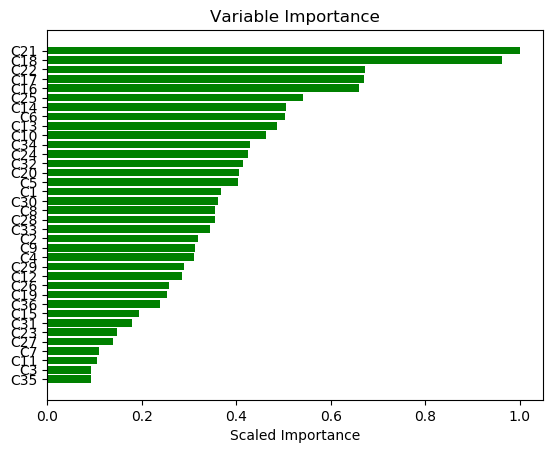

In [14]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### The six   most important features are: c18, c17, c22, c21, c24 y c20

### IV. Random Forest para Landsat usando Scikit-Learn

In [15]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True, random_state=0)
clf.fit(X, y)
print("la Precision estimada es", clf.score(X,y))

C:\Users\eacun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


la Precision estimada es 0.97271702367531


In [16]:
predictions = clf.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1072
           1       1.00      1.00      1.00       479
           2       0.95      1.00      0.97       961
           3       0.98      0.80      0.88       415
           4       1.00      0.93      0.97       470
           5       0.96      0.99      0.98      1038

    accuracy                           0.97      4435
   macro avg       0.98      0.96      0.97      4435
weighted avg       0.97      0.97      0.97      4435



In [17]:
#Estimacion del error usando out-of-bag
print(clf.oob_score_)

0.8985343855693348


In [18]:
a=clf.feature_importances_
print(np.argsort(a))

[26 10 30 34  6  2  7  3 22  0  9 35  8  1 14 11 25 29  5 27 18 28 23 32
 15 12  4 31 33 13 21 24 19 20 17 16]


#### The six most important features are: 17, 18, 21, 20, 25 y 22

### V. Applying Random Forest   to the adult dataset which contains missing values 

In [17]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=100,max_depth=20,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print ((y_pred['predict']==datos['C15']).sum()/float(len(datos)))
model.model_performance(datos)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
0.9431835631583797

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.04882803021096279
RMSE: 0.22097065463758483
LogLoss: 0.17019118507788158
Mean Per-Class Error: 0.05863094022004489
AUC: 0.986089755574899
pr_auc: 0.93208192823399
Gini: 0.972179511149798

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40168586573335857: 


,,<=50K,>50K,Error,Rate
0,<=50K,23561.0,1159.0,0.0469,(1159.0/24720.0)
1,>50K,701.0,7140.0,0.0894,(701.0/7841.0)
2,Total,24262.0,8299.0,0.0571,(1860.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.401686,0.884758,208.0
1,max f2,0.301638,0.923405,246.0
2,max f0point5,0.562885,0.898179,153.0
3,max accuracy,0.431932,0.943644,198.0
4,max precision,0.999860,1.000000,0.0
5,max recall,0.109777,1.000000,325.0
6,max specificity,0.999860,1.000000,0.0
7,max absolute_mcc,0.401686,0.847429,208.0
8,max min_per_class_accuracy,0.363725,0.938146,222.0
9,max mean_per_class_accuracy,0.325138,0.941369,237.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.20 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010718,0.998229,4.152659,4.152659,1.000000,0.999331,1.000000,0.999331,0.044510,0.044510,315.265910,315.265910
1,,2,0.020024,0.992822,4.152659,4.152659,1.000000,0.995904,1.000000,0.997738,0.038643,0.083153,315.265910,315.265910
2,,3,0.030005,0.985442,4.152659,4.152659,1.000000,0.989311,1.000000,0.994935,0.041449,0.124601,315.265910,315.265910
3,,4,0.040017,0.972222,4.152659,4.152659,1.000000,0.979330,1.000000,0.991031,0.041576,0.166178,315.265910,315.265910
4,,5,0.050029,0.950819,4.152659,4.152659,1.000000,0.962622,1.000000,0.985345,0.041576,0.207754,315.265910,315.265910
5,,6,0.100028,0.809787,4.137354,4.145009,0.996314,0.880940,0.998158,0.933159,0.206861,0.414615,313.735446,314.500913
6,,7,0.150026,0.685667,3.818508,4.036198,0.919533,0.748648,0.971955,0.871668,0.190920,0.605535,281.850778,303.619763
7,,8,0.200025,0.556405,3.415486,3.881043,0.822482,0.622697,0.934592,0.809435,0.170769,0.776304,241.548559,288.104344
8,,9,0.300021,0.305128,1.916906,3.226398,0.461609,0.420904,0.776947,0.679938,0.191685,0.967989,91.690621,222.639805
9,,10,0.400018,0.150736,0.312470,2.497972,0.075246,0.222384,0.601536,0.565558,0.031246,0.999235,-68.753026,149.797190


In [20]:
print(model.confusion_matrix)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1574793417261_1075


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,2828511.0,20.0,20.0,20.0,1741.0,2613.0,2167.1




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09558687124388582
RMSE: 0.3091712652299463
LogLoss: 0.3261281054133456
Mean Per-Class Error: 0.1714769143523649
AUC: 0.9145560645251559
pr_auc: 0.7478314461945205
Gini: 0.8291121290503118

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3783287955408613: 


,,<=50K,>50K,Error,Rate
0,<=50K,21921.0,2799.0,0.1132,(2799.0/24720.0)
1,>50K,1985.0,5856.0,0.2532,(1985.0/7841.0)
2,Total,23906.0,8655.0,0.1469,(4784.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378329,0.709990,213.0
1,max f2,0.163820,0.792865,304.0
2,max f0point5,0.632093,0.745845,121.0
3,max accuracy,0.540130,0.864470,152.0
4,max precision,0.986483,0.998641,6.0
5,max recall,0.000011,1.000000,399.0
6,max specificity,0.999970,0.999960,0.0
7,max absolute_mcc,0.400507,0.615269,203.0
8,max min_per_class_accuracy,0.289136,0.826043,250.0
9,max mean_per_class_accuracy,0.243147,0.828523,270.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.41 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.012438,1.000000,4.142406,4.142406,0.997531,1.000000,0.997531,1.000000,0.051524,0.051524,314.240562,314.240562
1,,2,0.020085,0.990741,4.152659,4.146309,1.000000,0.995886,0.998471,0.998434,0.031756,0.083280,315.265910,314.630947
2,,3,0.030005,0.969600,4.088376,4.127157,0.984520,0.978856,0.993859,0.991961,0.040556,0.123836,308.837645,312.715659
3,,4,0.040017,0.940395,4.050753,4.108041,0.975460,0.955787,0.989256,0.982911,0.040556,0.164392,305.075335,310.804112
4,,5,0.050029,0.908471,3.948848,4.076183,0.950920,0.924485,0.981584,0.971218,0.039536,0.203928,294.884761,307.618287
5,,6,0.100028,0.763492,3.476704,3.776536,0.837224,0.833514,0.909426,0.902387,0.173830,0.377758,247.670415,277.653554
6,,7,0.150026,0.625924,2.856866,3.470042,0.687961,0.696532,0.835619,0.833783,0.142839,0.520597,185.686621,247.004185
7,,8,0.200025,0.503658,2.239579,3.162473,0.539312,0.563988,0.761554,0.766345,0.111976,0.632572,123.957905,216.247338
8,,9,0.300021,0.328762,1.568726,2.631279,0.377764,0.407002,0.633637,0.646576,0.156868,0.789440,56.872564,163.127852
9,,10,0.400018,0.200242,1.039440,2.233349,0.250307,0.262152,0.537812,0.550477,0.103941,0.893381,3.944016,123.334948




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.09510421191228857
RMSE: 0.3083897078572639
LogLoss: 0.3089878156924833
Mean Per-Class Error: 0.17270192125533823
AUC: 0.9159642607586296
pr_auc: 0.7804057675973602
Gini: 0.8319285215172592

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40042919667861016: 


,,<=50K,>50K,Error,Rate
0,<=50K,22217.0,2503.0,0.1013,(2503.0/24720.0)
1,>50K,2128.0,5713.0,0.2714,(2128.0/7841.0)
2,Total,24345.0,8216.0,0.1422,(4631.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.400429,0.711590,198.0
1,max f2,0.153490,0.793843,304.0
2,max f0point5,0.578366,0.745991,133.0
3,max accuracy,0.521120,0.865545,153.0
4,max precision,0.999558,1.000000,0.0
5,max recall,0.000025,1.000000,399.0
6,max specificity,0.999558,1.000000,0.0
7,max absolute_mcc,0.413800,0.618413,193.0
8,max min_per_class_accuracy,0.287824,0.825607,246.0
9,max mean_per_class_accuracy,0.247687,0.827298,263.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.42 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,0.995984,4.152659,4.152659,1.000000,0.998595,1.000000,0.998595,0.041576,0.041576,315.265910,315.265910
1,,2,0.020116,0.985000,4.152659,4.152659,1.000000,0.990450,1.000000,0.994504,0.041959,0.083535,315.265910,315.265910
2,,3,0.030005,0.965566,4.139763,4.148409,0.996894,0.975921,0.998976,0.988379,0.040939,0.124474,313.976264,314.840868
3,,4,0.040017,0.937264,4.050753,4.123976,0.975460,0.952050,0.993093,0.979290,0.040556,0.165030,305.075335,312.397611
4,,5,0.050060,0.910000,3.974869,4.094063,0.957187,0.924078,0.985890,0.968214,0.039918,0.204948,297.486941,309.406330
5,,6,0.100028,0.760400,3.471184,3.782911,0.835894,0.832518,0.910961,0.900428,0.173447,0.378396,247.118400,278.291052
6,,7,0.150026,0.624695,2.831358,3.465791,0.681818,0.692721,0.834596,0.831207,0.141564,0.519959,183.135848,246.579143
7,,8,0.200025,0.501415,2.300798,3.174588,0.554054,0.562614,0.764471,0.764069,0.115036,0.634996,130.079761,217.458769
8,,9,0.300021,0.329300,1.580204,2.643181,0.380528,0.407293,0.636503,0.645156,0.158016,0.793011,58.020412,164.318091
9,,10,0.400018,0.201333,1.011382,2.235262,0.243550,0.263451,0.538273,0.549737,0.101135,0.894146,1.138165,123.526241




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.85931414,0.01197689,0.8604946,0.86650777,0.8514701,0.84603274,0.8540012,0.874811,0.87860394,0.84089535,0.8632266,0.85709786
1,auc,0.91611224,0.0059493766,0.91896284,0.9127275,0.92083323,0.9135113,0.91030014,0.92260766,0.9260737,0.9085165,0.91742015,0.9101697
2,err,0.14068587,0.01197689,0.13950539,0.13349225,0.14852986,0.15396726,0.14599878,0.12518899,0.12139606,0.15910466,0.1367734,0.1429021
3,err_count,457.9,38.112263,440.0,448.0,490.0,489.0,478.0,414.0,400.0,526.0,440.0,454.0
4,f0point5,0.7056888,0.024967711,0.68877554,0.7123356,0.6923587,0.6866858,0.70040774,0.719506,0.7552788,0.6656838,0.7269686,0.70888716
5,f1,0.71622825,0.013290821,0.7105263,0.71929824,0.7190367,0.71783036,0.709599,0.73393315,0.73614776,0.69058824,0.7197452,0.7055772
6,f2,0.7278219,0.017092219,0.7336956,0.7263984,0.74785304,0.75193423,0.71903473,0.74895066,0.7179619,0.7174285,0.71266395,0.702298
7,lift_top_group,4.156741,0.14925733,4.3805556,4.2751594,4.042892,3.9650438,4.067081,4.3976064,4.170886,4.148055,4.031328,4.0888033
8,logloss,0.3091142,0.015202545,0.2998007,0.3114324,0.29643008,0.32967544,0.3231848,0.29495695,0.28484398,0.30947664,0.3120216,0.32931945
9,max_per_class_error,0.2638114,0.026903814,0.25,0.2687898,0.23161764,0.22347066,0.27453417,0.24069148,0.2936709,0.26348808,0.29197994,0.2998713



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-11-26 13:37:59,31.093 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-11-26 13:38:00,31.127 sec,1.0,0.383101,3.356201,0.813282,0.366950,2.818547,0.188157
2,,2019-11-26 13:38:00,31.162 sec,2.0,0.376146,2.965148,0.819997,0.373880,2.946647,0.189224
3,,2019-11-26 13:38:00,31.196 sec,3.0,0.369599,2.600570,0.829674,0.393345,3.022937,0.183134
4,,2019-11-26 13:38:00,31.233 sec,4.0,0.360762,2.207526,0.842695,0.416428,3.131588,0.180337
5,,2019-11-26 13:38:00,31.271 sec,5.0,0.354023,1.871653,0.851947,0.442245,3.247180,0.179719
6,,2019-11-26 13:38:00,31.310 sec,6.0,0.347761,1.584699,0.861194,0.465047,3.357360,0.177966
7,,2019-11-26 13:38:00,31.351 sec,7.0,0.344116,1.403492,0.866247,0.486939,3.430619,0.177070
8,,2019-11-26 13:38:00,31.390 sec,8.0,0.339904,1.212797,0.872111,0.506551,3.543976,0.176163
9,,2019-11-26 13:38:00,31.436 sec,9.0,0.336619,1.074917,0.876883,0.519835,3.640716,0.171386



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C8,46661.078125,1.000000,0.151850
1,C11,41674.937500,0.893141,0.135624
2,C6,37954.976562,0.813418,0.123518
3,C1,29174.330078,0.625239,0.094943
4,C7,27878.939453,0.597477,0.090727
5,C4,25909.691406,0.555274,0.084319
6,C5,24547.943359,0.526090,0.079887
7,C13,18376.775391,0.393835,0.059804
8,C3,17236.193359,0.369391,0.056092
9,C12,10957.041016,0.234822,0.035658


<bound method H2OBinomialModel.confusion_matrix of >


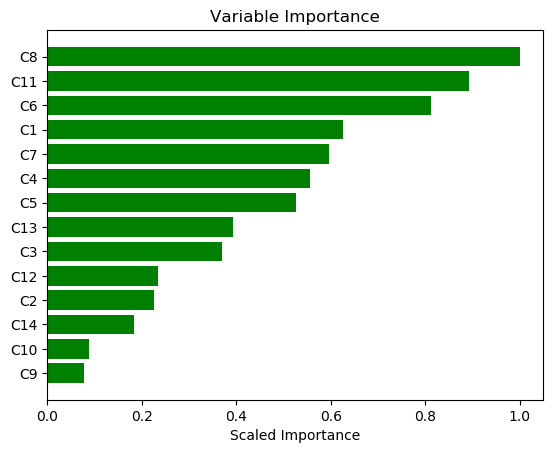

In [21]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()